<a href="https://colab.research.google.com/github/c-bujari/CAP4630/blob/master/ImageProcessingAssignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# EEL 4660 - Image Processing Assignment
#### Clyde Bujari
---
Implement the basic image processing methods we've discussed in class: convolution/correlation, color histogram analysis, Canny edge detection.

In [156]:
# Load the Drive helper and mount
from google.colab import drive

# This will prompt for authorization.
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [157]:
# After executing the cell above, Drive
# files will be present in "/content/drive/My Drive".
!ls "/content/drive/My Drive/Colab Notebooks/ImageProcessingFiles/Images"

eureka-vacuum-small.png  puzzle_1.jpg  single-parrot-small.png
group-parrot-small.png	 query_1.jpg


## 1. 1D Convolution
After loading the staircaase image included with scipy.misc
1. Calculate the height and width of the staircase image and display the image
2. Retrieve the first row of the image
3. Create a numpy array with the finite difference filter [-1, 1]
4. Apply the filter to one row of the image (no need to reverse it for convolution).  Please implement this yourself only using NumPy functions but not OpenCV or scipy
5. Plot the intensity of the first row and the output of the finite difference filter on a graph (the x value should be the index and the y value the intensity) 


Width: 512
Height: 512


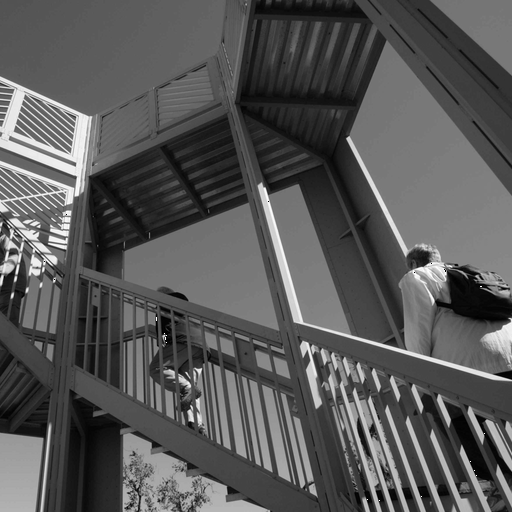

In [158]:
# Required to use the imshow command within colab
from google.colab.patches import cv2_imshow

# Numpy, Matplotlib and OpenCV are required
import cv2
import matplotlib.pyplot as plt
import numpy as np

from scipy import misc

# load the staircase image
ascent=misc.ascent() 

#1: Calculate height and width, display image
print("Width: %d" % (ascent.shape[1]))
print("Height: %d" % (ascent.shape[0]))
cv2_imshow(ascent)

In [159]:
#2: Retrieve the first row
imrow = ascent[1:2, :]

# The shape I chose still allows cv2_imshow to display the row if desired
# cv2_imshow(imrow)

In [160]:
#3: Create the 1x2 finite difference filter
# Filter's shape matches shape of row
filter = np.array([[-1, 1]])

In [161]:
#4: Filter the row using only numpy functions

# Arrays must be flattened to work with np.convolve.
output = np.convolve(imrow.flatten(), filter.flatten())

# # Uncomment if you want to see the image (cv2_imshow requires shape (1, x))
# imagify = np.array([output])
# cv2_imshow(imagify)

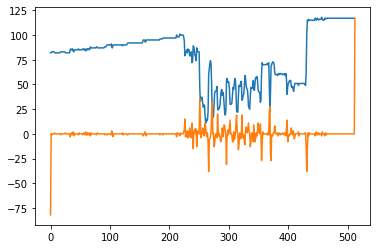

In [162]:
#5: Plot the intensity of both the first row and the filtered output

# output is one index larger than imrow, so we need seperate x ranges
x1 = np.arange(imrow.shape[1])
x2 = np.arange(output.shape[0])

# plt does not accept shape (1, x), so flatten first row
plt.plot(x1, imrow.flatten())

# Output is already flattened
plt.plot(x2, output)

# Show both results (original in blue, filtered in orange)
plt.show()

## 2. 2D Linear Filters
1. Create 3x3 numpy arrays for the linear filter to highlight vertical edges and horizontal edges (consult Lecture 5)
2. Apply signal.convolve2d (see reference guide https://docs.scipy.org/doc/scipy/reference/generated/scipy.signal.convolve2d.html)
3. Display the original image and the 2 filtered images

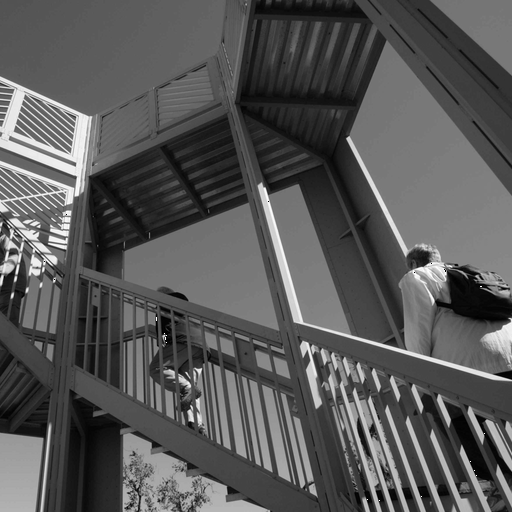

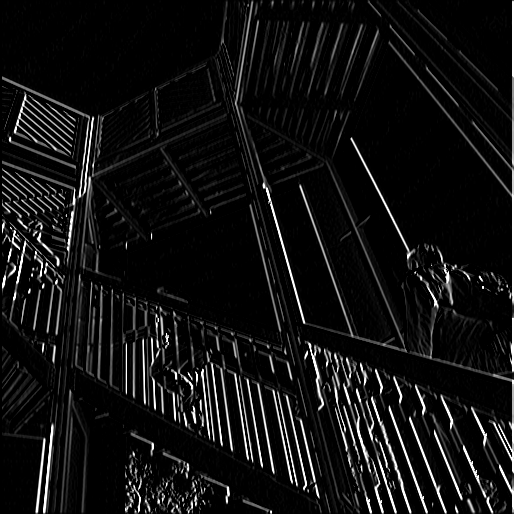

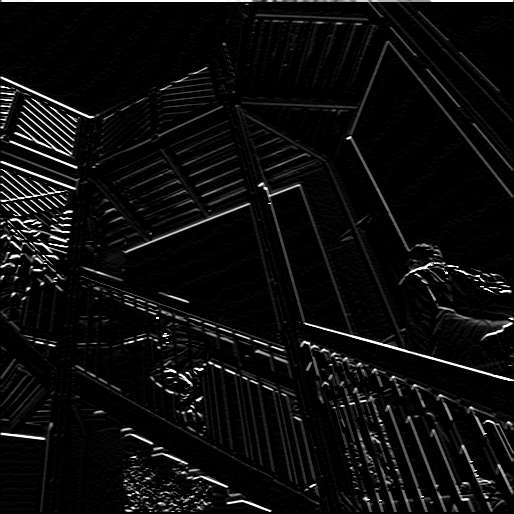

In [163]:
from scipy import signal
from scipy import misc
import matplotlib.pyplot as plt

ascent=misc.ascent()

#1: create the numpy filters
v_filter = np.array([[-1,0,1],[-1,0,1],[-1,0,1]])
h_filter = np.array([[1,1,1],[0,0,0],[-1,-1,-1]])

#2: apply them using signal.convolve2d
v_filtered = signal.convolve2d(ascent, v_filter)
h_filtered = signal.convolve2d(ascent, h_filter)

#3: display the original imaage and the filtered images
cv2_imshow(ascent)
cv2_imshow(v_filtered)
cv2_imshow(h_filtered)

## 3. OpenCV Template Matching
Evaluate the performance of 2 OpenCV template matching options (cv2.TM_COEFF and TM_CCORR) at finding Waldo.  You are allowed to use any OpenCV methods that you wish.
https://docs.opencv.org/master/d4/dc6/tutorial_py_template_matching.html
1. Load and display the puzzle image and the query image. Calculate the height and the width of the query image (Waldo).  
2. Apply the template matching method and display the result.
3. Find the location of the max value in the result.
4. Make a copy of the puzzle image using copy() and draw a rectangle on the maximum location.  To size the rectangle, use the height and width of the Waldo query image. (the reason you are making a copy is to avoid drawing rectangles from both the methods on the same image).
5. Display the image with the rectangle drawn.
6. Repeat the procedure using the other method
7. Report which method correctly finds Waldo.



In [164]:
from matplotlib import pyplot as plt
import numpy as np
import cv2
from google.colab.patches import cv2_imshow

Load puzzle image and display it

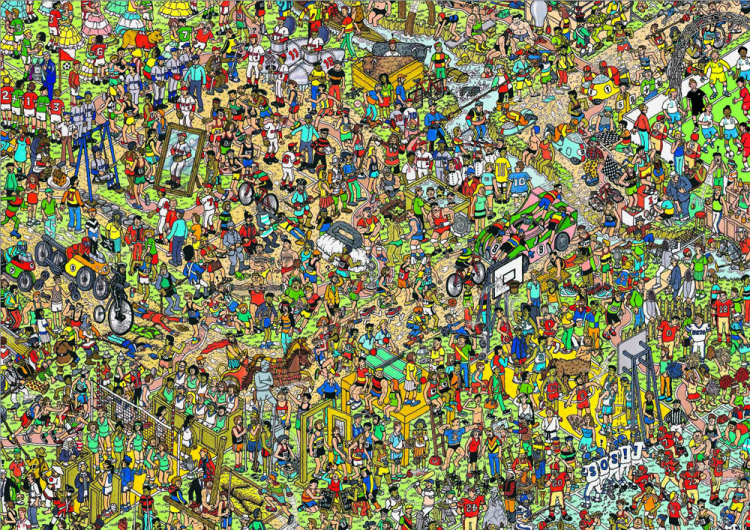

height=33 width=15


In [165]:
# 1. Load and display puzzle and query image. Calculate height/width of query image
scene = cv2.imread("/content/drive/My Drive/Colab Notebooks/ImageProcessingFiles/Images/puzzle_1.jpg")
scene.shape
scaleAndShow(scene, 75)

waldo = cv2.imread("/content/drive/My Drive/Colab Notebooks/ImageProcessingFiles/Images/query_1.jpg")
cv2_imshow(waldo)

height, width = waldo.shape[:2]
print("%s=%s" % ("height", height), "%s=%s" % ("width", width))

Perform template matching using the matchTemplate function in openCV which slides template image over scene image and get scores for matches at each position

Try using both cv2.TM_COEFF and TM_CCORR

Report which one gets the correct answer.

In [183]:
use = scene.copy()
## TM_CCOEFF gets the correct answer - TM_CCORR shown later but gets the wrong answer
result1 = cv2.matchTemplate(use, waldo, cv2.TM_CCOEFF)

Display the results using Matplotlib

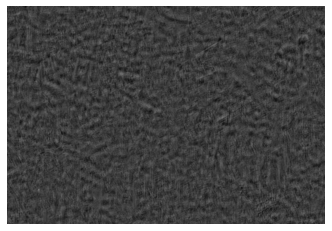

In [184]:
plt.imshow(result1, cmap='gray')
plt.axis('off')
plt.show()

Find the highest score and print the location where it is located in the image

In [185]:
min_val, max_val, min_loc, max_loc = cv2.minMaxLoc(result1)
print(max_loc)

(98, 569)


Make a copy of puzzle image

In [186]:
copied_image = scene.copy()

Draw rectangle on image where the best score is found using a color that the TA can see using cv2.rectangle and display the image

In [187]:
top_left = max_loc[0] - 2, max_loc[1] - 2
bottom_right = top_left[0] + width + 2, top_left[1] + height + 2
cv2.rectangle(copied_image, top_left, bottom_right, (255, 0, 255), 2)

array([[[169, 179, 173],
        [109, 127, 120],
        [142, 159, 150],
        ...,
        [152, 142, 142],
        [143, 138, 140],
        [122, 122, 128]],

       [[108, 121, 113],
        [ 96, 161, 140],
        [ 95, 196, 164],
        ...,
        [ 56,  41,  15],
        [ 64,  47,  26],
        [ 64,  44,  27]],

       [[137, 155, 142],
        [ 94, 207, 173],
        [ 56, 240, 186],
        ...,
        [ 75,  60,  11],
        [ 82,  57,  13],
        [147, 105,  63]],

       ...,

       [[152, 153, 163],
        [ 20,  55,  45],
        [ 91, 195, 154],
        ...,
        [ 29,  25,  20],
        [ 29,  27,  19],
        [ 24,  24,  10]],

       [[138, 139, 149],
        [ 18,  53,  43],
        [ 99, 203, 162],
        ...,
        [ 24,  20,  15],
        [ 28,  26,  18],
        [ 25,  25,  11]],

       [[132, 133, 143],
        [ 67, 102,  92],
        [133, 237, 196],
        ...,
        [ 26,  22,  17],
        [ 22,  20,  12],
        [ 22,  22,   8]]

Display image using OpenCV

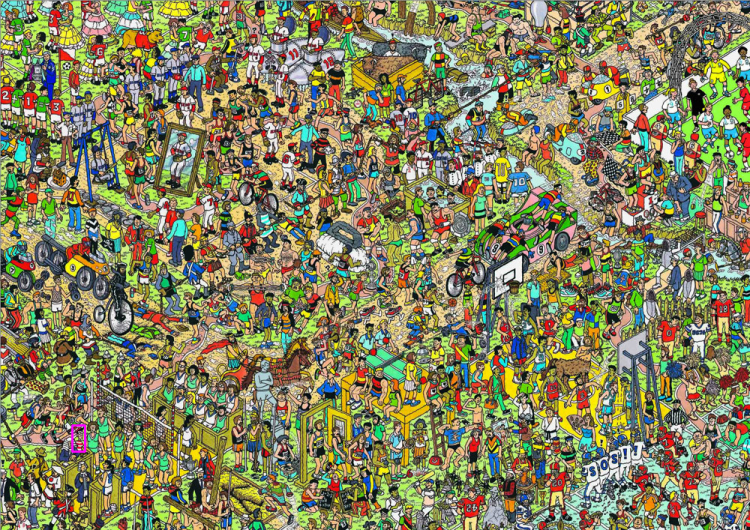

In [188]:
scaleAndShow(copied_image, 75)

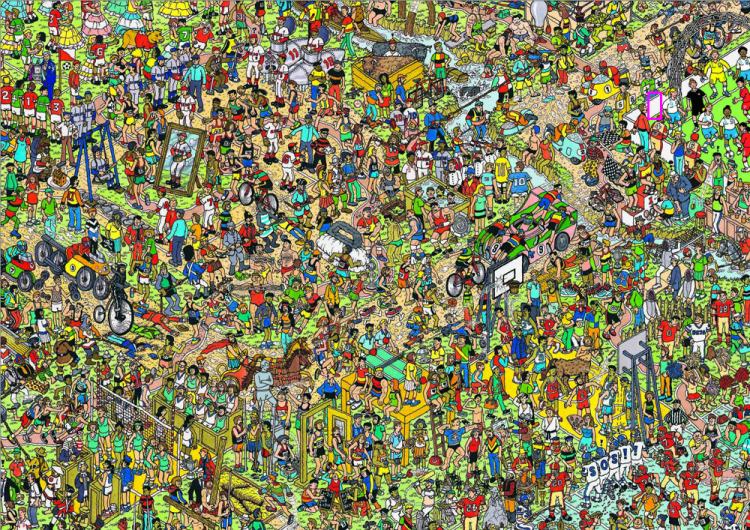

In [190]:
#6 - Try with the other method
# Process is the same, but we use TM_CCORR instead

## Get the other result and max location
result2 = cv2.matchTemplate(use, waldo, cv2.TM_CCORR)
min_val, max_val, min_loc, max_loc = cv2.minMaxLoc(result2)

## Make another copy of the scene and draw rectangle
copied_image = scene.copy()
top_left = max_loc[0] - 2, max_loc[1] - 2
bottom_right = top_left[0] + width + 2, top_left[1] + height + 2
cv2.rectangle(copied_image, top_left, bottom_right, (255, 0, 255), 2)

# Show image
scaleAndShow(copied_image, 75)

7. Report which method correctly finds Waldo.

The TM_CCOEFF method correctly finds Waldo. The other method found nothing but an empty space at the top right of the image.

## 4. Color Histograms

1. Load the images of the parrot, group of parrots and the vacuum cleaner.
2. Display the images.
3. Calculate the color histogram of the images and normalize them. Please consult the OpenCV documentation for this: https://docs.opencv.org/3.4/d8/dbc/tutorial_histogram_calculation.html  Remember that by default openCV loads images using BGR convention.
4. Plot the color histograms for the blue, green, and red values (preferably on the same axes using a bin size of 256)).  Do this for each of the three images.
5. Recalculate the histograms using bin sizes of [8, 8, 8] for b,g,r and compare them using compareHist cv2.HISTCMP_INTERSECT (intersection).  Print the results of comparing the parrot image to itself, to the group of parrots and to the vacuum cleaner.

### 1. Load the images

In [173]:
parrot = cv2.imread("/content/drive/My Drive/Colab Notebooks/ImageProcessingFiles/Images/single-parrot-small.png")
parrot_group = cv2.imread("/content/drive/My Drive/Colab Notebooks/ImageProcessingFiles/Images/group-parrot-small.png")
vacuum = cv2.imread("/content/drive/My Drive/Colab Notebooks/ImageProcessingFiles/Images/eureka-vacuum-small.png")

### 2. Display images

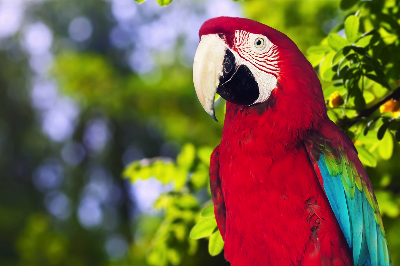

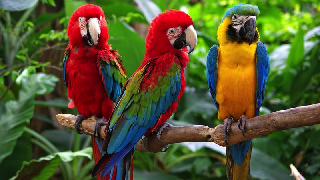

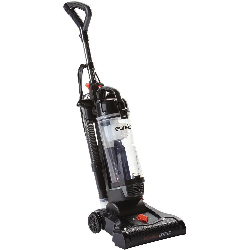

In [174]:
cv2_imshow(parrot)
cv2_imshow(parrot_group)
cv2_imshow(vacuum)	

## 3. Calculate and normalize the color histograms for each image

In [175]:
# Helper function, returns a saveable histImage for reuse
def createHistogram(image, bin_size):
  histSize = bin_size
  hist_w = 512
  hist_h = 400
  histRange = (0, 256) # the upper boundary is exclusive
  accumulate = False

  # Split image into each b/g/r and calculate histograms
  bgr_planes = cv2.split(image)
  b_hist = cv2.calcHist(bgr_planes, [0], None, [histSize], histRange, accumulate=accumulate)
  g_hist = cv2.calcHist(bgr_planes, [1], None, [histSize], histRange, accumulate=accumulate)
  r_hist = cv2.calcHist(bgr_planes, [2], None, [histSize], histRange, accumulate=accumulate)

  # Normalize values
  cv2.normalize(b_hist, b_hist, alpha=0, beta=hist_h, norm_type=cv2.NORM_MINMAX)
  cv2.normalize(g_hist, g_hist, alpha=0, beta=hist_h, norm_type=cv2.NORM_MINMAX)
  cv2.normalize(r_hist, r_hist, alpha=0, beta=hist_h, norm_type=cv2.NORM_MINMAX)

  # Draw each histogram in histImage
  bin_w = int(np.round( hist_w/histSize ))
  histImage = np.full((hist_h, hist_w, 3), 50, dtype=np.uint8)
  
  for i in range(1, histSize):
      cv2.line(histImage, ( bin_w*(i-1), hist_h - int(np.round(b_hist[i-1])) ),
              ( bin_w*(i), hist_h - int(np.round(b_hist[i])) ),
              ( 255, 0, 0), thickness=2)
      cv2.line(histImage, ( bin_w*(i-1), hist_h - int(  (g_hist[i-1])) ),
              ( bin_w*(i), hist_h - int(np.round(g_hist[i])) ),
              ( 0, 255, 0), thickness=2)
      cv2.line(histImage, ( bin_w*(i-1), hist_h - int(np.round(r_hist[i-1])) ),
              ( bin_w*(i), hist_h - int(np.round(r_hist[i])) ),
              ( 0, 0, 255), thickness=2)
  
  return histImage

In [176]:
parrotHist = createHistogram(parrot, 256)
groupHist = createHistogram(parrot_group, 256)
vacuumHist = createHistogram(vacuum, 256)

### 4. Plot the color histograms for the blue, green, and red values (bin size = 256)

In [177]:
# Helper function, display saved histogram, scaled as desired
def scaleAndShow(histImage, scale_percent):
  width = int(histImage.shape[1] * scale_percent / 100)
  height = int(histImage.shape[0] * scale_percent / 100) 530
  # resize image
  resized = cv2.resize(histImage, dim, interpolation = cv2.INTER_AREA) 
  
  cv2_imshow(resized)

Histogram for parrot:


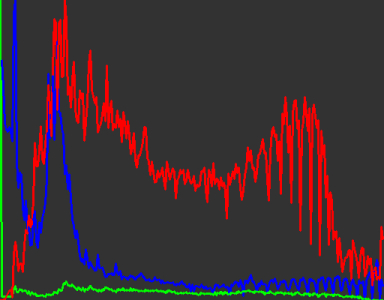

Histogram for parrot group:


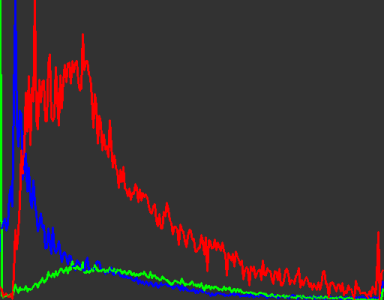

Histogram for vacuum:


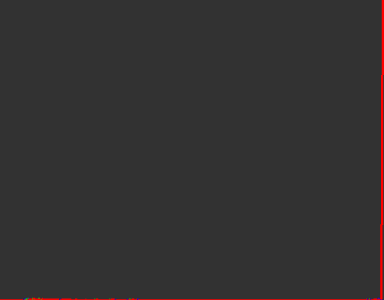

In [178]:
# Execute helper function on all 3 images with a bin size of 256
print("Histogram for parrot:")
scaleAndShow(parrotHist, 75)
print("Histogram for parrot group:")
scaleAndShow(groupHist, 75)
print("Histogram for vacuum:")
scaleAndShow(vacuumHist, 75)

### 5. Recalculate the histograms using bin sizes of [8, 8, 8] for b,g,r and compare them using compareHist cv2.HISTCMP_INTERSECT (intersection). Print the results of comparing the parrot image to itself, to the group of parrots and to the vacuum cleaner.

In [179]:
# Create the histograms with bin size of 8
parrotHist8 = createHistogram(parrot, 8)
groupHist8 = createHistogram(parrot_group, 8)
vacuumHist8 = createHistogram(vacuum, 8)

# Turn them into np.float32 for comparison
cParrot = np.float32(parrotHist8)
cGroup = np.float32(groupHist8)
cVacuum = np.float32(vacuumHist8)

# Do each comparison
c1 = cv2.compareHist(cParrot, cParrot, cv2.HISTCMP_INTERSECT)
c2 = cv2.compareHist(cParrot, cGroup, cv2.HISTCMP_INTERSECT)
c3 = cv2.compareHist(cParrot, cVacuum, cv2.HISTCMP_INTERSECT)

# Print results - my results on this are very off for some reason
print("Comparing Parrot to Parrot w/ intersection:", c1)
print("Comparing Parrot to Group w/ intersection:", c2)
print("Comparing Parrot to Vacuum w/ intersection:", c3)

Comparing Parrot to Parrot w/ intersection: 31469175.0
Comparing Parrot to Group w/ intersection: 29428735.0
Comparing Parrot to Vacuum w/ intersection: 29769250.0


## 5. Canny Edge Detection

1. Convert the parrot image to grayscale
2. Apply the Canny edge detection OpenCV function it with low threshold of 100 and high threshold of 200.
3. Display the result.

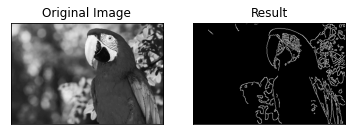

In [180]:
# 1. Convert the parrot image to grayscale
gray = cv2.cvtColor(parrot, cv2.COLOR_BGR2GRAY)

# 2. Apply canny edge detection, low threshold = 100, high = 200
edges = cv2.Canny(gray,100,200)

# 3. Display the result
plt.subplot(121),plt.imshow(gray,cmap = 'gray')
plt.title('Original Image'), plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(edges,cmap = 'gray')
plt.title('Result'), plt.xticks([]), plt.yticks([])  
plt.show()